# Basketball analytics: distilling and summarizing Information

#### Due: May 11 at 10 pm

When analyzing data, setting a goal is often helpful. In this assignment, the focus is on understanding how NMF behaves, and further analyzing player data.

In all the problems below, take a step back and think about each procedure as a piece in a bigger puzzle of understanding the game of basketball and its players. This goal should guide any decisions we make, and insights we interpret.

## Preparing Data

In the previous notebook `07-Shooting-Pattern-Analysis`, we computed smoothed shot patterns for 362 players that played during 2016-17 regular season. Save the matrix `X` from Non-negative matrix factorization (NMF) section.

Please create this file from saving the appropriate variable into a picke file called `allpatterns2016-17.pkl`. After saving the file, you can load it via the following command:

In [24]:
import pickle
X = pickle.load(open('allpatterns2016-17.pkl', 'rb'))

## Non-negative Matrix Factorization (NMF) notation

Non-negative matrix factorization was used on the smoothed shooting pattern data of around 360 players. The result was useful in
* Bases: Identifying modes of shooting style (number of modes was determined by `n_components` argument to `NMF` function)
* Coefficients: How each players shooting style could be expressed as a linear combination of these bases (matrix multiplication between the bases and coefficients achieve this)

Recall the following. Given some matrix $X$ is $p\times n$ matrix, NMF computes the following factorization:
$$ \min_{W,H} \| X - WH \|_F\\
\text{ subject to } W\geq 0,\ H\geq 0, $$
where $W$ is ${p\times r}$ matrix and $H$ is ${r\times n}$ matrix.


## Problem 1

__PSTAT 134 and 234__: Experiment with different number of `n_components` to change the number of bases vectors. Visualize the bases vectors.

What value of $r$ seem to be too small? (`r` is too small to represent diversity of shooting modes) What value of $r$ seem to be too large? (`r` is too large and some bases seem to be duplicated). Note that, if a basis were a perfect duplicate of another (they will not be, but could be similar), you would use one basis instead of two.

__PSTAT 234 (optional for 134)__: Choose two different choices for number of components, say $r_1=3$ and $r_2=20$. Reconstruct the shooting pattern of at least two player using 3 bases and 20 bases. Is there any difference between the reconstruction?

- For a given player, plot the original shooting frequencies and corresponding reconstruction for $r \in \{3,20\}$.

Compute the difference: i.e., the norm of the difference  $ \min_{W_r,H_r} \| X - W_rH_r \|_F$. Plot the approximation error as a function of $r$. (Note the subscript $r$ makes the choice of $r$ explicit.) Choose at least 10 different choices of $r$. Based on this plot, what can you say about choosing $r$?

In [27]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as skld

import helper_basketball as h


In [28]:
## bin edge definitions in inches
xedges = (np.linspace(start=-25, stop=25, num=151, dtype=np.float)) * 12
yedges = (np.linspace(start= -4, stop=31, num=106, dtype=np.float)) * 12


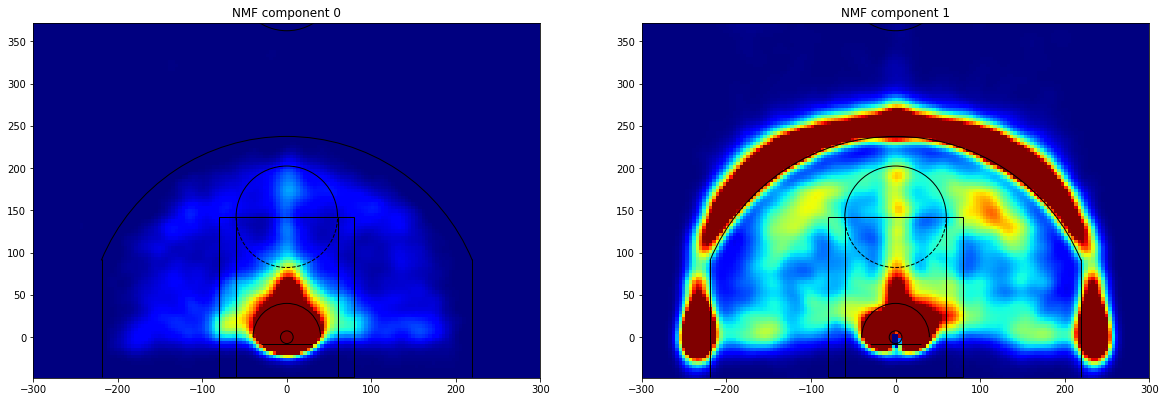

In [32]:
model = skld.NMF(n_components=2, init='nndsvda', max_iter=500, random_state=0)
W = model.fit_transform(X)
H = model.components_

fig, ax = plt.subplots(1, 2, figsize=(20,40))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

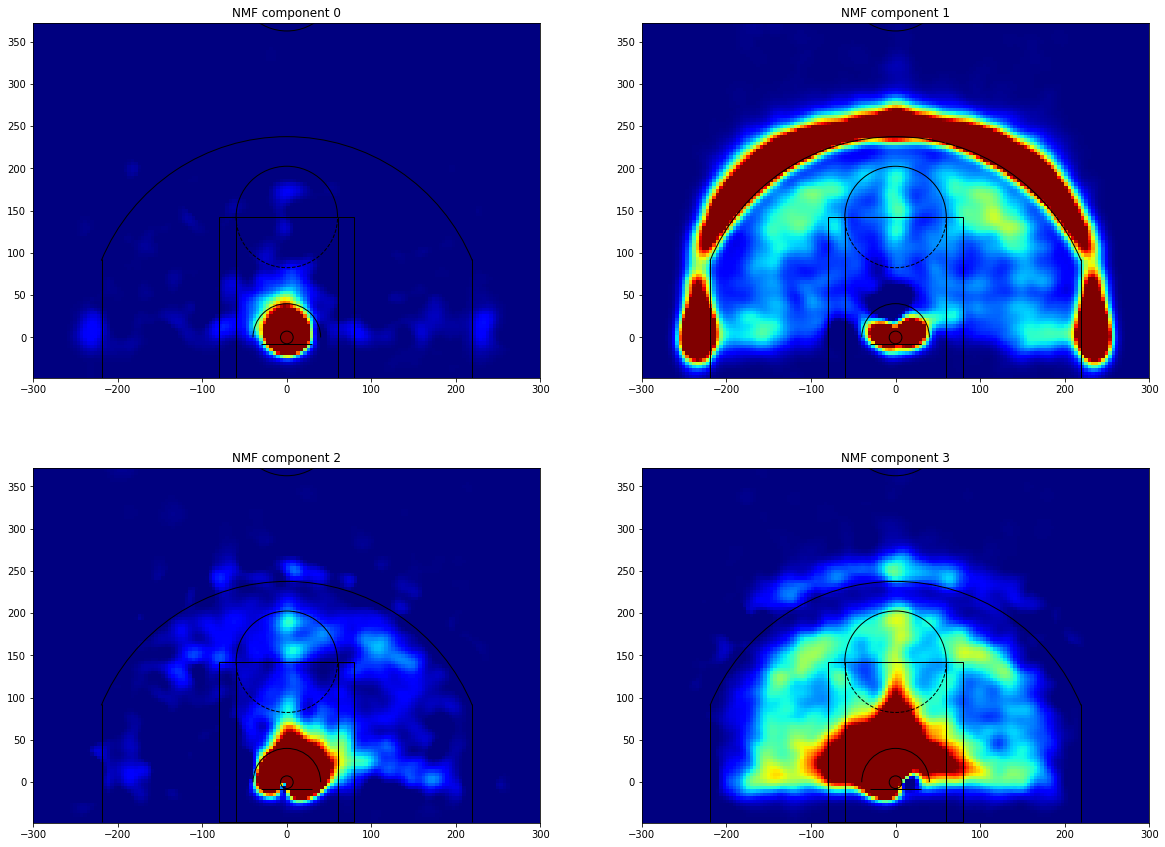

In [42]:
model = skld.NMF(n_components=4, init='nndsvda', max_iter=500, random_state=0)
W = model.fit_transform(X)
H = model.components_

fig, ax = plt.subplots(2, 2, figsize=(20,15))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

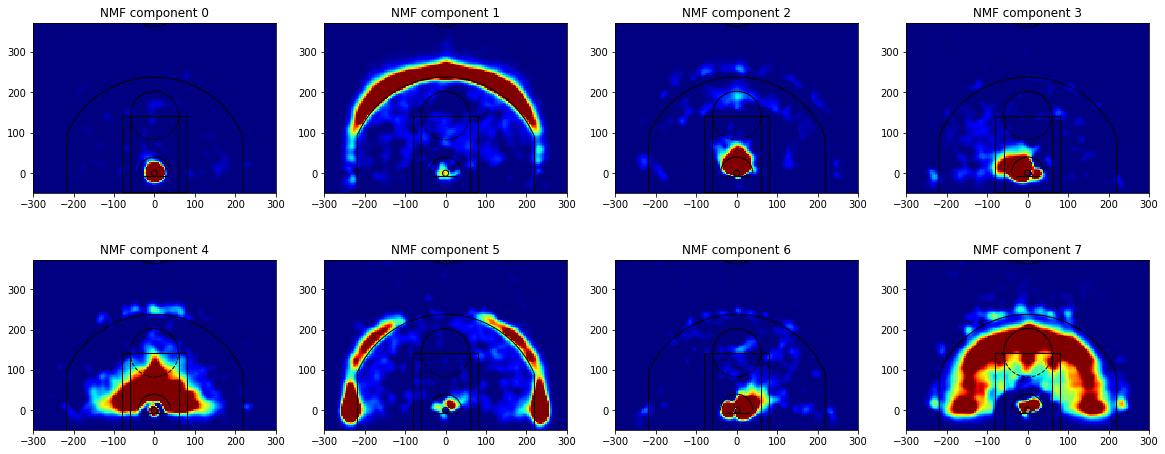

In [46]:
model = skld.NMF(n_components=8, init='nndsvda', max_iter=500, random_state=0)
W = model.fit_transform(X)
H = model.components_

fig, ax = plt.subplots(2, 4, figsize=(20,8))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

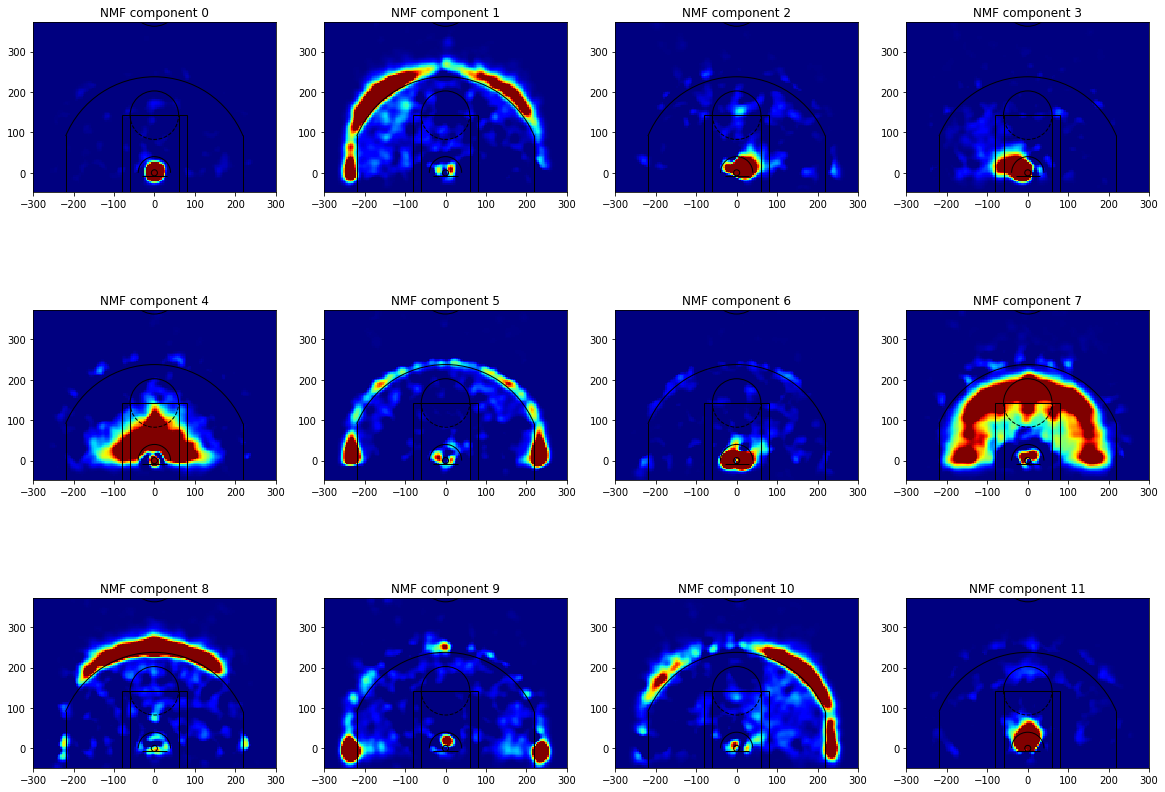

In [49]:
model = skld.NMF(n_components=12, init='nndsvda', max_iter=500, random_state=0)
W = model.fit_transform(X)
H = model.components_

fig, ax = plt.subplots(3, 4, figsize=(20,15))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

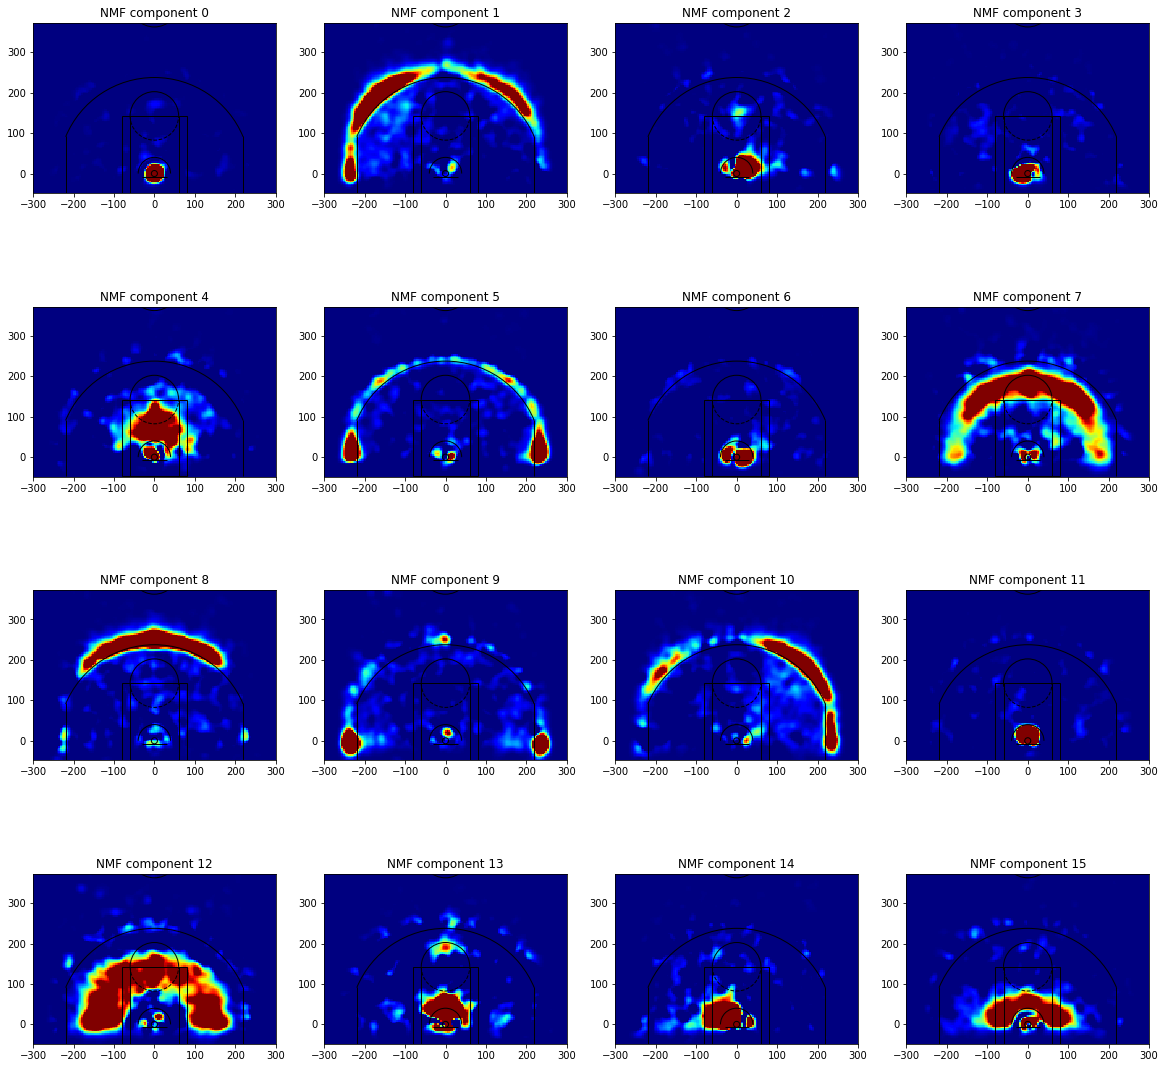

In [50]:
model = skld.NMF(n_components=16, init='nndsvda', max_iter=500, random_state=0)
W = model.fit_transform(X)
H = model.components_

fig, ax = plt.subplots(4, 4, figsize=(20,20))

for i, axi in enumerate(ax.flatten()):
    h.plot_shotchart(W[:,i], xedges, yedges, ax=axi)
    axi.set_title('NMF component ' + str(i))

I believe that the value $r$, that indicates the number of bases, seems to be too small at value 4. At this value, the bases vectors show a generalized area of shooting modes but do not represent the full diversity of them. I also believe that the $r$ value of 16 is too large, resulting in duplicated bases. NMF components 0, 3, and 11 all seem similar enough for me to consider them duplicates (although they will never be exact duplicates).

## Problem 2

__PSTAT 134 and 234__: In the previous question, NMF gave us a set of bases to describe each player. So, the comparison is through a standard set of shooting styles. We may also approach the comparison more directly.

* In this problem, we compare of players' shooting styles to each other directly. What we are interested in is pairwise correlation between shooting patterns. Let $X_i$ represent the column in the smoothed shooting pattern for player $i$. Then, we want to compute   
    $$ R = [\text{Cor} (X_i, X_j)]_{i,j} $$ for all player combinations $i,j\in\{1,2,\dots,362\}$. What is the correct orientation of matrix $X$? What should be the dimension of matrix $R$?   
    _Note: if your command is not running properly, you may be running into the issue of using too much memory, and your notebook session is rebooted by the server as a result._
    
* Visualize matrix $R$ with [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.

* Identify 2 pairs of players with highest similarities (positive correlation) and 2 pairs with lowest similarity (negative correlation). Plot their shooting pattern. What do you observe?

__PSTAT 234 (optional for 134)__: Perform hierarchical clustering with matrix $R$, and visualize the clustered matrix.

In [55]:
X_test = X[:,0:362].copy()
R = np.corrcoef(X_test,rowvar=0) # Transpose to compute correlation between colums

In [56]:
R.shape

(362, 362)

In [60]:
import seaborn as sns; sns.set()
#ax = sns.heatmap(R)

In [59]:
R

array([[ 1.        ,  0.48840093,  0.6172336 , ...,  0.85332746,
         0.68627375,  0.72179806],
       [ 0.48840093,  1.        ,  0.24589216, ...,  0.40060274,
         0.36499611,  0.35406752],
       [ 0.6172336 ,  0.24589216,  1.        , ...,  0.56694034,
         0.55138416,  0.45384762],
       ..., 
       [ 0.85332746,  0.40060274,  0.56694034, ...,  1.        ,
         0.56849095,  0.91837964],
       [ 0.68627375,  0.36499611,  0.55138416, ...,  0.56849095,
         1.        ,  0.44465658],
       [ 0.72179806,  0.35406752,  0.45384762, ...,  0.91837964,
         0.44465658,  1.        ]])

In [65]:
df = pd.DataFrame(R)

c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so

172  326    0.000034
326  172    0.000034
120  339    0.000189
339  120    0.000189
303  308    0.000236
308  303    0.000236
57   337    0.000270
337  57     0.000270
179  39     0.000277
39   179    0.000277
57   139    0.000345
139  57     0.000345
264  259    0.000398
259  264    0.000398
225  87     0.000401
87   225    0.000401
142  57     0.000425
57   142    0.000425
249  7      0.000436
7    249    0.000436
2    353    0.000450
353  2      0.000450
57   325    0.000482
325  57     0.000482
233  342    0.000498
342  233    0.000498
331  85     0.000526
85   331    0.000526
1    338    0.000542
338  1      0.000542
              ...   
264  264    1.000000
265  265    1.000000
266  266    1.000000
267  267    1.000000
268  268    1.000000
249  249    1.000000
180  180    1.000000
248  248    1.000000
246  246    1.000000
227  227    1.000000
228  228    1.000000
229  229    1.000000
230  230    1.000000
231  231    1.000000
232  232    1.000000
233  233    1.000000
234  234    1

## Problem 3

__PSTAT 134 and 234__: How would you use the coefficients matrix $H$ from NMF  or the correlation matrix $R$ (computed above) to differentiate between types of players? Consider what the coefficients represent, and how you can use them to discriminate player types.

Give your thought process, reasoning for your chosen method, and the results. Do they look reasonable? Do you expect any of the comparison to be similar to any of the [figures here](https://fastbreakdata.com/classifying-the-modern-nba-player-with-machine-learning-539da03bb824)? Why, or why not? Can you verify your intuition?

## Problem 4

__PSTAT 134 and 234__: Suppose you are in charge of a basketball team. How would you use this information? How would you use what you have learned from analyzing the data, and what other questions would you like to answer with further analysis.